In [1]:
# Milestone Assignment 2: Principal Component Analysis (PCA)
# Step 1: PCA Implementation on Breast Cancer Dataset

# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 2. Load dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

print("Dataset shape:", X.shape)
print("Target classes:", target_names)

# 3. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Fit PCA to check explained variance
pca_full = PCA()
pca_full.fit(X_scaled)

explained = pca_full.explained_variance_ratio_
print("\nExplained variance ratio (first 5 PCs):")
for i, var in enumerate(explained[:5], start=1):
    print(f"PC{i}: {var:.4f}")

print(f"\nCumulative variance (PC1 + PC2): {explained[0] + explained[1]:.4f}")

# 5. Inspect top contributing features to PC1 & PC2
loadings = pca_full.components_.T  # shape: (n_features, n_components)
loading_df = pd.DataFrame(loadings, index=feature_names,
                          columns=[f"PC{i+1}" for i in range(loadings.shape[1])])

def top_features(pc, n=8):
    """Return top n features by absolute loading for a given principal component."""
    s = loading_df[pc].abs().sort_values(ascending=False).head(n)
    return pd.DataFrame({
        "feature": s.index,
        "abs_loading": s.values,
        "signed_loading": loading_df.loc[s.index, pc].values
    })

print("\nTop contributing features to PC1:")
print(top_features("PC1"))

print("\nTop contributing features to PC2:")
print(top_features("PC2"))


Dataset shape: (569, 30)
Target classes: ['malignant' 'benign']

Explained variance ratio (first 5 PCs):
PC1: 0.4427
PC2: 0.1897
PC3: 0.0939
PC4: 0.0660
PC5: 0.0550

Cumulative variance (PC1 + PC2): 0.6324

Top contributing features to PC1:
                feature  abs_loading  signed_loading
0   mean concave points     0.260854        0.260854
1        mean concavity     0.258400        0.258400
2  worst concave points     0.250886        0.250886
3      mean compactness     0.239285        0.239285
4       worst perimeter     0.236640        0.236640
5       worst concavity     0.228768        0.228768
6          worst radius     0.227997        0.227997
7        mean perimeter     0.227537        0.227537

Top contributing features to PC2:
                   feature  abs_loading  signed_loading
0   mean fractal dimension     0.366575        0.366575
1  fractal dimension error     0.280092        0.280092
2  worst fractal dimension     0.275339        0.275339
3              mean rad


Original data shape: (569, 30)
Shape after PCA: (569, 2)
Explained variance ratio for 2 components:
[0.44272026 0.18971182]
Cumulative variance (PC1 + PC2): 0.6324320765155944


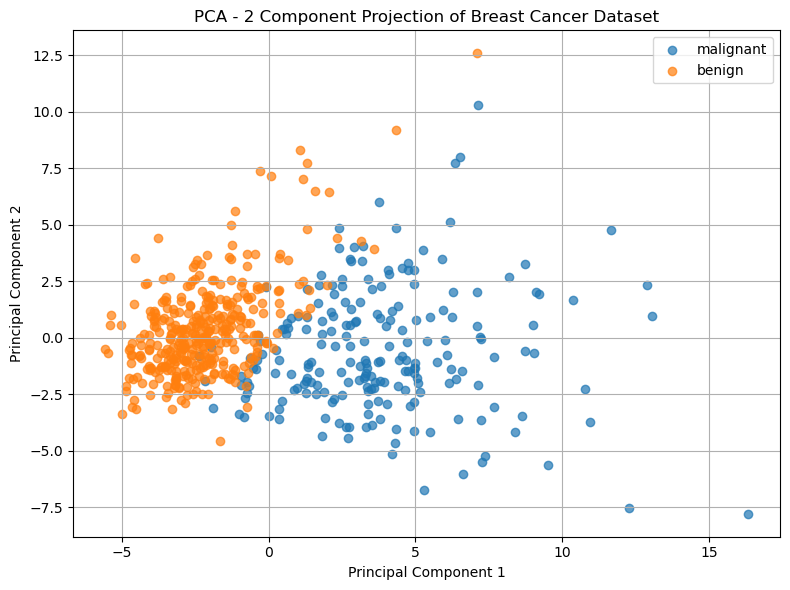

In [2]:
# Step 2: Dimensionality Reduction (reduce to 2 PCA components)

# Initialize PCA with 2 components
pca2 = PCA(n_components=2)

# Fit PCA to the scaled data and transform it into 2 PCs
X_pca2 = pca2.fit_transform(X_scaled)

print("\nOriginal data shape:", X_scaled.shape)
print("Shape after PCA:", X_pca2.shape)
print("Explained variance ratio for 2 components:")
print(pca2.explained_variance_ratio_)
print("Cumulative variance (PC1 + PC2):", pca2.explained_variance_ratio_.sum())

# Visualize the 2D projection
plt.figure(figsize=(8, 6))
for label, name in zip([0, 1], target_names):
    plt.scatter(X_pca2[y == label, 0], X_pca2[y == label, 1],
                label=name, alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - 2 Component Projection of Breast Cancer Dataset")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


=== Logistic Regression on 2 PCA Components ===
Accuracy on test set: 0.9474

Confusion Matrix:
[[40  2]
 [ 4 68]]

Classification Report:
              precision    recall  f1-score   support

   malignant       0.91      0.95      0.93        42
      benign       0.97      0.94      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



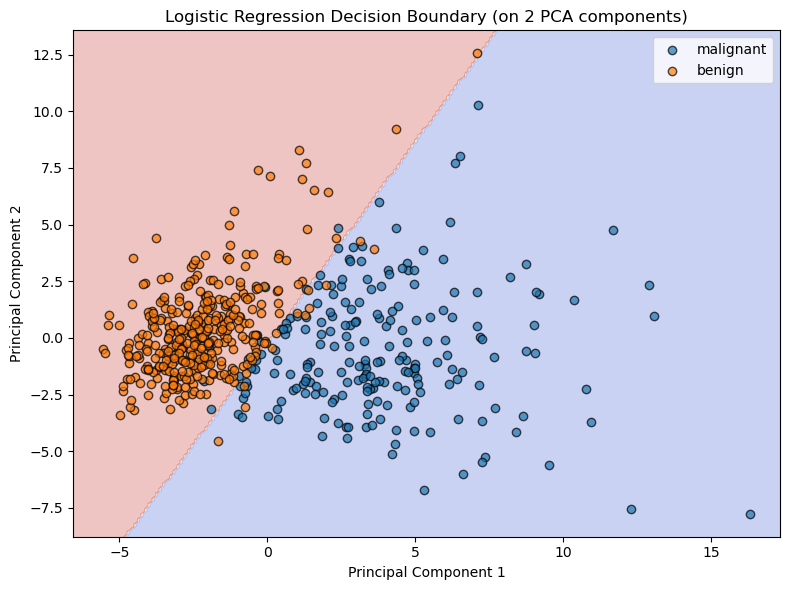

In [3]:
# Logistic Regression using PCA output

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Split the PCA-reduced data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_pca2, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Initialize and train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# 3. Make predictions on the test set
y_pred = log_reg.predict(X_test)

# 4. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=target_names)

print("\n=== Logistic Regression on 2 PCA Components ===")
print(f"Accuracy on test set: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

# 5. Visualize decision boundary
import numpy as np
xx, yy = np.meshgrid(
    np.linspace(X_pca2[:, 0].min() - 1, X_pca2[:, 0].max() + 1, 200),
    np.linspace(X_pca2[:, 1].min() - 1, X_pca2[:, 1].max() + 1, 200),
)
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = log_reg.predict(grid_points).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
for label, name in zip([0, 1], target_names):
    plt.scatter(X_pca2[y == label, 0], X_pca2[y == label, 1],
                label=name, alpha=0.7, edgecolor="k")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Logistic Regression Decision Boundary (on 2 PCA components)")
plt.legend()
plt.tight_layout()
plt.show()